## Artificial Neural Network

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/100
14/14 [==============================] - 6s 68ms/step - loss: 1.1053 - accuracy: 0.3426 - val_loss: 1.0124 - val_accuracy: 0.8333
Epoch 2/100
14/14 [==============================] - 0s 9ms/step - loss: 0.9927 - accuracy: 0.5556 - val_loss: 0.9166 - val_accuracy: 0.9167
Epoch 3/100
14/14 [==============================] - 0s 18ms/step - loss: 0.8349 - accuracy: 0.8056 - val_loss: 0.7797 - val_accuracy: 0.8333
Epoch 4/100
14/14 [==============================] - 0s 18ms/step - loss: 0.6363 - accuracy: 0.8241 - val_loss: 0.6526 - val_accuracy: 0.8333
Epoch 5/100
14/14 [==============================] - 0s 14ms/step - loss: 0.4905 - accuracy: 0.8426 - val_loss: 0.5588 - val_accuracy: 0.9167
Epoch 6/100
14/14 [==============================] - 0s 18ms/step - loss: 0.4046 - accuracy: 0.8611 - val_loss: 0.4957 - val_accuracy: 0.9167
Epoch 7/100
14/14 [==============================] - 0s 11ms/step - loss: 0.3506 - accuracy: 0.8796 - val_loss: 0.4377 - val_accuracy: 0.9167
Epoch 8

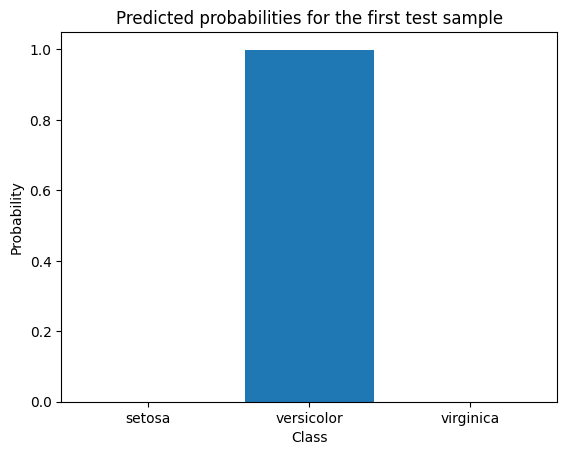

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Step 1: Load and Preprocess Data
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the target labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Build the Neural Network Model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # Input layer with 64 neurons
    Dense(32, activation='relu'),                                  # Hidden layer with 32 neurons
    Dense(16, activation='relu'),                                  # Hidden layer with 16 neurons
    Dense(y.shape[1], activation='softmax')                        # Output layer with softmax activation
])

# Step 3: Compile the Model
model.compile(optimizer='adam',               # Adam optimizer
              loss='categorical_crossentropy', # Loss function for multi-class classification
              metrics=['accuracy'])            # Metric to evaluate during training

# Step 4: Train the Model
model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.1)  # Train the model for 100 epochs

# Step 5: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

# Predicting on test data
predictions = model.predict(X_test)

# Displaying the first prediction and the corresponding label
import matplotlib.pyplot as plt

print("First prediction (probabilities):", predictions[0])
print("Predicted class:", np.argmax(predictions[0]))
print("True class:", np.argmax(y_test[0]))

# Visualize the results
plt.bar(range(len(iris.target_names)), predictions[0])
plt.xticks(range(len(iris.target_names)), iris.target_names)
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Predicted probabilities for the first test sample')
plt.show()
